In [ ]:
!pip install -U ollama langchain langchain-ollama langchain-community python-dotenv datasets faiss-cpu tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires 

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh
!pip -q install aiohttp pyngrok

import os
import asyncio
from google.colab import userdata

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 10.0 MB/s eta 0:00:00


In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!ollama pull gemma3:12b

In [ ]:
!ollama pull nomic-embed-text

In [ ]:
!ollama list

NAME                       ID              SIZE      MODIFIED               
nomic-embed-text:latest    0a109f422b47    274 MB    Less than a second ago    
gemma3:12b                 f4031aab637d    8.1 GB    9 seconds ago             


In [ ]:
import os
from dotenv import load_dotenv
from langchain_ollama.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
import ollama, base64
from io import BytesIO
from PIL import Image
# load_dotenv("env")

In [ ]:
## configs variables

base_url="http://127.0.0.1:11434"

In [ ]:
chat = ChatOllama(model="gemma3:12b",
                  temperature=0,
                  base_url=base_url
                  # server_url="http://172.18.0.5:11434",
                  # server_type="http"
                 )

In [ ]:
def convert_to_base64(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format='JPEG')
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

In [ ]:
def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}"
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]

In [ ]:
chain = prompt_func | chat | StrOutputParser()

In [ ]:
# pil_image = Image.open("/content/IMG_20250712_214136_1.jpg")
pil_image = Image.open("/content/IMG_20250712_223956.jpg")
# pil_image = Image.open("/content/IMG_20250712_224109.jpg")

In [ ]:
image_b64 = convert_to_base64(pil_image)

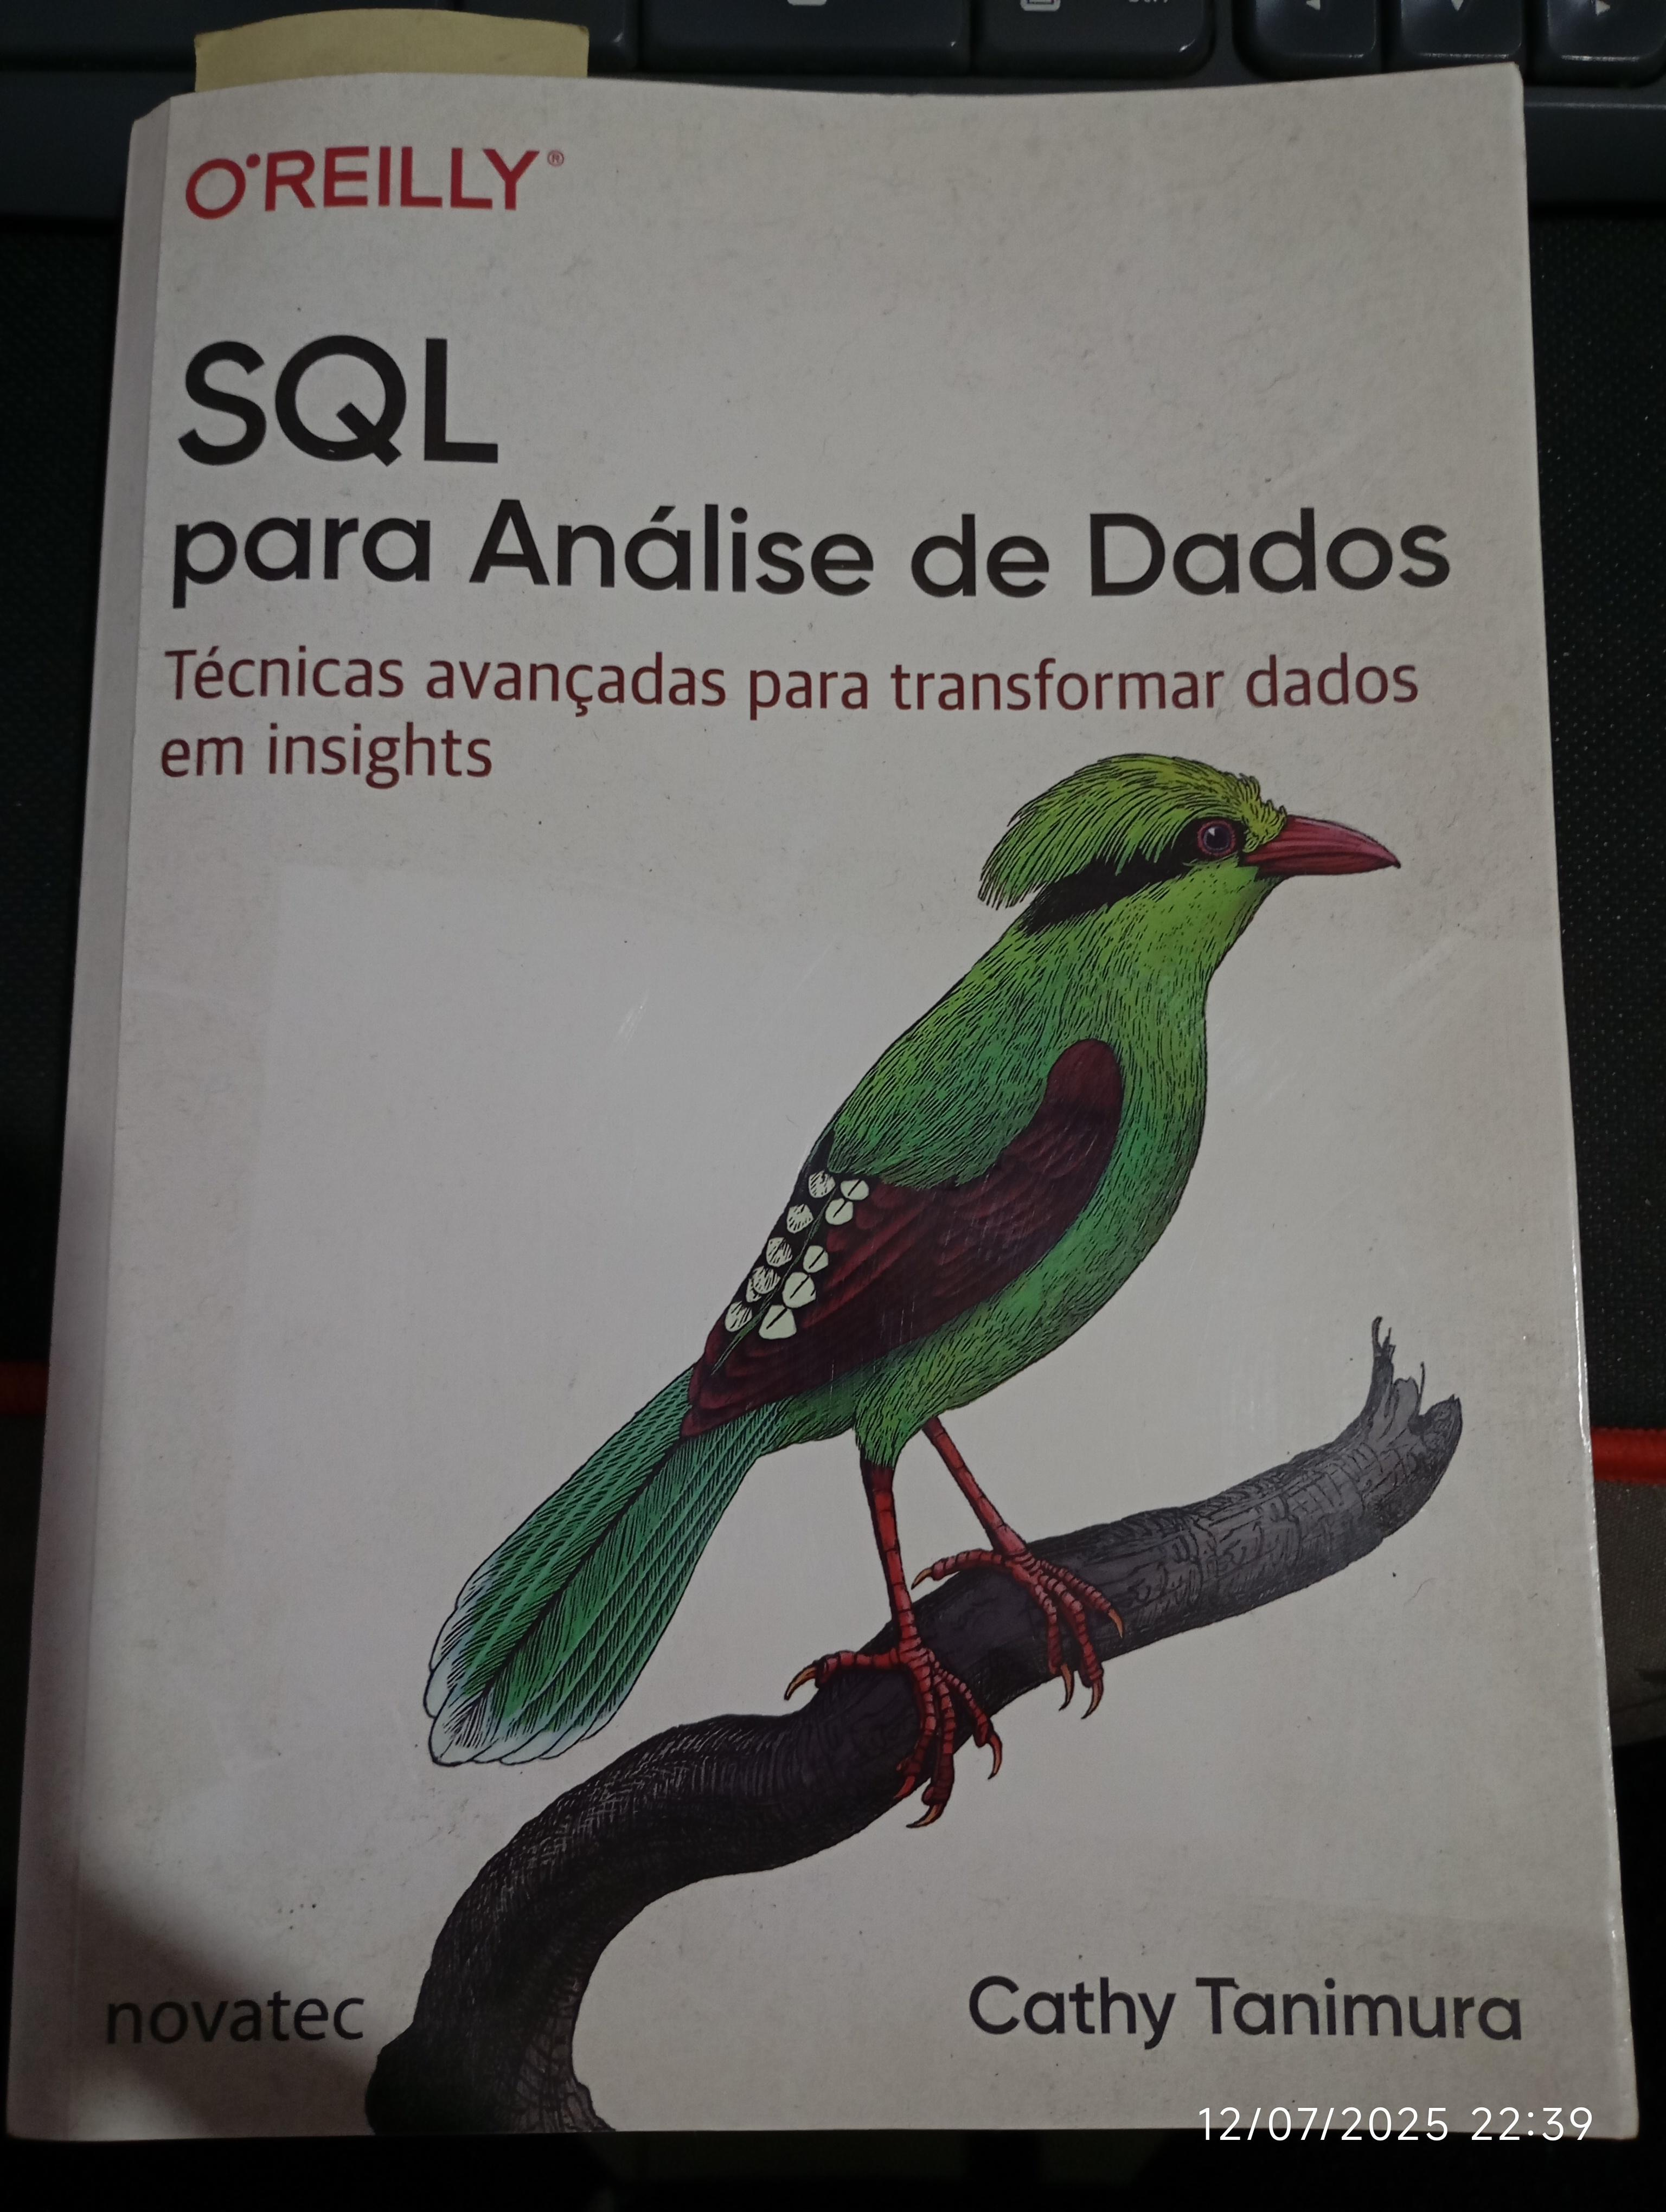

In [ ]:
from IPython.display import Image


def veja_image(image_base64):
  image_bytes = base64.b64decode(image_base64)
  filename = '/tmp/image.jpg'
  with open(filename, 'wb') as f:
    f.write(image_bytes)
  display(Image(filename))


# for res in resultados:
veja_image(image_b64)

In [ ]:
example = """
        {
            'autores': 'Ana Maria',
            'titulo': 'Guerra dos Chips',
            'editora': 'Alta Books',
            'descrição': 'Esse livro aborda os seguintes topicos sobre computação quantica...'
        }

"""

In [ ]:
query_chain = chain.invoke({"text": f"Você fará um OCR e sempre devolverá o resultado em JSON conforme o exemplo: {example}", "image": image_b64})

In [ ]:
query_chain

'Aqui está a resposta em formato JSON, baseada na imagem fornecida:\n\n```json\n{\n  "autores": "Cathy Tanemura",\n  "titulo": "SQL",\n  "editora": "O\'Reilly",\n  "descrição": "Técnicas avançadas para transformar dados"\n}\n```'

In [ ]:
from langchain_ollama import OllamaLLM

In [ ]:
llm = OllamaLLM(model="gemma3:12b",
                  temperature=0,
                  base_url=base_url
                  # server_url="http://172.18.0.5:11434",
                  # server_type="http"
                 )

In [ ]:
llm_com_imagem_contexto = llm.bind(images=[image_b64])

In [ ]:
llm_com_imagem_contexto.invoke(f"Você fara um OCR e devolverá o resultado em JSON como o exemplo a seguir: {example}")
# llm_com_imagem_contexto.invoke("Você fara um OCR e devolverá o resultado em JSON")

'Aqui está o resultado do OCR em formato JSON:\n\n```json\n{\n  "autores": "Cathy Tanimura",\n  "titulo": "SQL",\n  "editora": "O\'Reilly"\n}\n```\n'

In [ ]:
# response = ollama.chat(
#     temperature=0,
#     base_url=base_url,
#     model='gemma3:4b',
#     messages=[{
#         'role': 'user',
#         'content': f"Você fara um OCR e devolverá o resultado em JSON como o exemplo a seguir: {example}",
#         'images': ['IMG_20250712_214136_1.jpg']
#     }]
# )

In [ ]:
# response